# 2 数据模块

## 2.1 Dataset

用来**构造支持索引的数据集**。本质为抽象类，使用时需继承后定义自己的数据集类。

Dataset主要分为2种：Map-style datasets和Iterable-style datasets

### 2.1.1 Map-style datasets 映射类

需自行实现`__init__`、`__getitem__`和`__len__`方法，它代表数据的索引到真正数据样本的映射。读取的数据并非直接把所有数据读取出来，而是读取的数据的索引或者键值

+ `__init__`：构造数据集

#### 自定义类

In [4]:
import torch
from torch.utils.data import Dataset

class MyDataSet(Dataset):
    def __init__(self):
        pass

    def __getitem__(self):
        pass

    def __len__(self):
        pass

In [15]:
# 示例
class GetTrainTestData(Dataset):
    def __init__(self,inputLen,outputLen,trainRate,isTrain=True):
        arr = torch.arange(0,100,0.1)
        self.x = torch.sin(arr)
        self.sampleLen = len(self.x)
        self.inputLen = inputLen
        self.outputLen = outputLen
        self.trainRate = trainRate
        self.src = []
        self.trg = []

        trainNum = int(self.sampleLen * trainRate)
        if isTrain:
            # 训练集
            for i in range(trainNum - outputLen - inputLen):
                split = i+outputLen
                self.src.append(arr[i:split])
                self.trg.append(arr[split:split+inputLen])

        else:
            # 测试集
            for i in range(trainNum, self.sampleLen - outputLen - inputLen):
                split = i+outputLen
                self.src.append(arr[i:split])
                self.trg.append(arr[split:split+inputLen])
        print(f'init over, src.len={len(self.src)}, src.trg={len(self.trg)}')

    def __getitem__(self,index):
        return self.src[index], self.trg[index]

    def __len__(self):
        return len(self.src)

dataTrain = GetTrainTestData(3,1,0.8)
dataTest = GetTrainTestData(3,1,0.8,False)

init over, src.len=796, src.trg=796
init over, src.len=196, src.trg=196


#### 内置类

如TensorDataset，仅接受若干同长度的张量。

In [18]:
import torch
from torch.utils.data import TensorDataset, Dataset, DataLoader

arr = torch.arange(0,1000,0.1)
src = torch.sin(arr)
trg = torch.cos(arr)

data = TensorDataset(src, trg)
dataLoaderTrain = DataLoader(data, batch_size=5, shuffle=False)
# enumerate 给每个 batch 编号：index 从 0 开始。
for index,train in enumerate(dataLoaderTrain):
    print(index, train)
    break

0 [tensor([0.0000, 0.0998, 0.1987, 0.2955, 0.3894]), tensor([1.0000, 0.9950, 0.9801, 0.9553, 0.9211])]


### 2.1.2 Iterable-style datasets 迭代类

需自行实现`__init__`和`__iter__`方法。他会将真实的数据全部载入，然后在整个数据集上进行迭代。

内置类有IterableDataset

## 2.2 DataLoader

Dataset和DataLoader是一起使用的，本质是**将已经加载好的数据以模型能够接收的方式输入到即将训练的模型中去**。

DataLoader是用来在Dataset里取出一组数据(mini-batch)供训练时快速使用的。在模型训练的过程中不断为模型提供数据，同时，使用Dataset加载出来的数据集也是DataLoader的第一个参数。

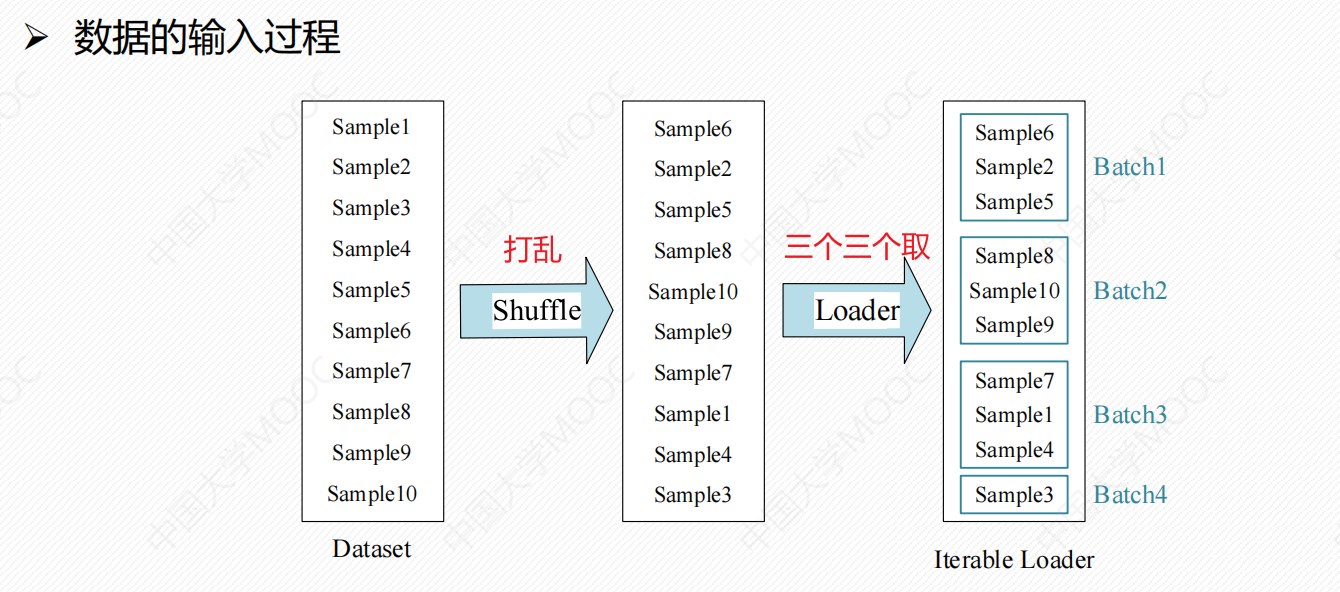

In [22]:
# 以自定义类GetTrainTestData为例子
dataTrain = GetTrainTestData(3,1,0.8)
dataTest = GetTrainTestData(3,1,0.8,False)
data_loader_train = DataLoader(dataTrain, batch_size=5, shuffle=False)
data_loader_test = DataLoader(dataTest, batch_size=5, shuffle=False)

for index,data in enumerate(data_loader_test):
    data_out = data[0]
    data_input = data[1]
    print(index,data_out,data_input)
    break

init over, src.len=796, src.trg=796
init over, src.len=196, src.trg=196
0 tensor([[80.0000],
        [80.1000],
        [80.2000],
        [80.3000],
        [80.4000]]) tensor([[80.1000, 80.2000, 80.3000],
        [80.2000, 80.3000, 80.4000],
        [80.3000, 80.4000, 80.5000],
        [80.4000, 80.5000, 80.6000],
        [80.5000, 80.6000, 80.7000]])
